## Predicting Bike Rentals

### Chani Greenes

### Introduction: 
In this project we are analyzing a dataset from the district of Washington, D.C complied from their communal bike sharing stations. Each row of the dataset includes detailed data and represents the number of bike rentals for a single hour of a single day. Our goal is to devlop a model to predict the total number of bikes rented in a given hour. We will use the following machine learning models in this project:
Linear Regression
Decision Trees
Random Forests
XGBoost

In [3]:
# import the necessary librarires
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [4]:
# set up a random seed for consistent reuslts
np.random.seed(42)

In [5]:
# read in the data
bike_rentals = pd.read_csv("bike rentals.csv")

In [6]:
# Explore the data
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Text(0, 0.5, 'Frequency')

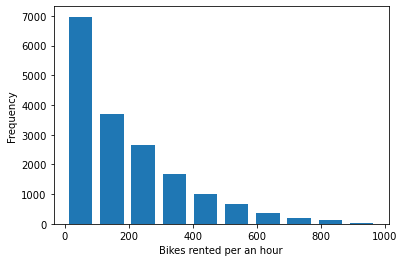

In [10]:
# histogram of bike rentals per a day
plt.hist(bike_rentals['cnt'], rwidth=0.75)
plt.xlabel('Bikes rented per an hour')
plt.ylabel('Frequency')


In [7]:
# viweing correlation and correlation maps
bike_rentals.corr()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


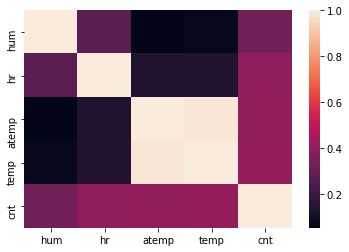

In [8]:
# heatmap of high correlation columns
corr_columns = bike_rentals.drop(labels = ['registered', 'casual','dteday'], axis =1)
sorted_corrs=corr_columns.corr()['cnt'].sort_values()
sorted_corrs = np.abs(sorted_corrs)
strong_corrs=sorted_corrs[sorted_corrs>.3]
corr_mat=bike_rentals[strong_corrs.index].corr()
corr_mat = np.abs(corr_mat)
sns.heatmap(corr_mat)

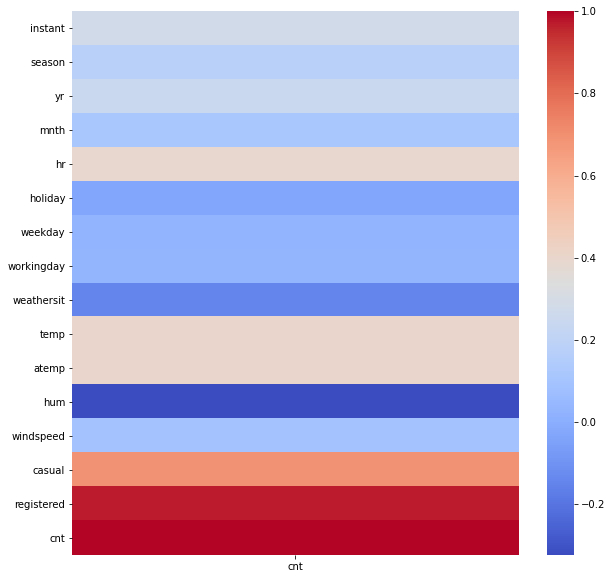

In [9]:
# heatmap showing correlation of columns to just the number of bike rentals
fig, ax = plt.subplots(figsize=(10,10))
cor=bike_rentals.corr()[['cnt']]
sns.heatmap(cor, cmap='coolwarm')

In [10]:
# we need to bundle the hours together to make them more meaningful for machine learning
def assign_label(hour):
     if hour >= 6 and hour < 12:
        return 1
     elif hour >= 12 and hour < 18:
        return 2
     elif hour >= 18 and hour < 24:
        return 3
     else:
        return 4

In [11]:
bike_rentals['time_label']= bike_rentals['hr'].apply(assign_label)

In [12]:
bike_rentals['time_label'].value_counts()

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

We are going to use the RMSE score for the error metric because the data is linear and continuous and not categorical.


In [13]:
# split the dataset into test and train
train = bike_rentals.sample(frac = .8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

We choose the feature columns that had the highest correlation. We did not use atemp because it was too 
similiar to temp so we needed to choose just one of them. We added in season because we were consistently got lower 
results for each model when we added this in without affecting the overfitting too much. 

In [14]:
features = ['temp','time_label','hum','season']

In [15]:
target = ['cnt']

## Linear Regression

In [16]:
lr = LinearRegression()
lr.fit(train[features], train[target])
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(test[features])
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [17]:
print(train_rmse, test_rmse)

144.6041381043234 145.4806477901981


The rmse for the test set is 145.48 At this point we have nothing to compare too so we will try other models 
in an effort to get better results. 

## Decision Trees

In [18]:
regressor = DecisionTreeRegressor()
regressor.fit(train[features], train[target])
train_predictions=regressor.predict(train[features])
test_predictions=regressor.predict(test[features])
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [19]:
print(train_rmse, test_rmse)

98.31499012504729 147.3065725358748


In [20]:
for i in range(1,25):
    regressor = DecisionTreeRegressor(min_samples_leaf = i)
    regressor.fit(train[features], train[target])
    train_predictions=regressor.predict(train[features])
    test_predictions=regressor.predict(test[features])
    train_mse = mean_squared_error(train_predictions, train[target])
    test_mse = mean_squared_error(test_predictions, test[target])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    print(train_rmse, test_rmse)
    

98.31499012504729 147.86416787187304
104.5229056446063 141.91893972601133
108.16754667417665 138.14143398432
110.484769295319 136.0811096067483
112.64648902026343 134.6354321603688
114.25347318916448 133.1731876101688
115.5819632332118 132.22285995635843
116.33374022177675 132.01746831674885
117.02159847966317 132.12602807102505
117.8235427556936 131.98935768566602
118.69802015063607 131.871544777143
119.1509736059388 131.41476137647058
119.48178429091662 131.53885080742484
119.86988180670211 130.85499744291056
120.12019651128838 130.62226958574757
120.51659197842083 130.6650611072712
120.89836437665979 130.81703861410452
121.25846944850929 130.5222711638839
121.67873212734133 130.18915350515792
121.86079193932417 130.2040749935446
122.07533646573697 130.29369520197034
122.26087898966858 129.99531842771898
122.50791929841118 130.3465698914953
122.68149676631828 130.37822167240068


We see that the higher the minimum samples of leaves the lower the rmse score and the overfitting is also less.

In [21]:
for i in range(1,25):
    regressor = DecisionTreeRegressor(min_samples_leaf = 25, max_depth =i)
    regressor.fit(train[features], train[target])
    train_predictions=regressor.predict(train[features])
    test_predictions=regressor.predict(test[features])
    train_mse = mean_squared_error(train_predictions, train[target])
    test_mse = mean_squared_error(test_predictions, test[target])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    print(i, train_rmse, test_rmse)

1 154.46029262706884 157.7480336131348
2 142.1863304704919 146.06073162145466
3 136.2781619028209 139.22562864042854
4 133.37738595871852 135.89420607790458
5 131.18327026627554 134.73180505213068
6 129.6290924002946 133.4924466915021
7 128.13237796281456 131.65421949017815
8 126.72856711331939 130.87022855452688
9 125.22290632268107 129.97858795467295
10 124.34879007222416 130.11796586977343
11 123.83265696362719 130.30685890015056
12 123.40714803050506 130.08245589050796
13 123.05337596511117 130.59226271920303
14 122.87553115751521 130.31363693836212
15 122.80861085820817 130.295974902173
16 122.80861085820817 130.295974902173
17 122.80861085820817 130.295974902173
18 122.80861085820817 130.295974902173
19 122.80861085820817 130.295974902173
20 122.80861085820817 130.295974902173
21 122.80861085820817 130.295974902173
22 122.80861085820817 130.295974902173
23 122.80861085820817 130.295974902173
24 122.80861085820817 130.295974902173


We see around 9 is the lowest rmse score for the max_depth and with least differnece from the train set so it is not too overfitted. 

In [35]:
regressor = DecisionTreeRegressor(min_samples_leaf = 25, max_depth=9)
regressor.fit(train[features], train[target])
train_predictions=regressor.predict(train[features])
test_predictions=regressor.predict(test[features])
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(train_rmse, test_rmse)

125.22290632268107 129.97858795467295


The best rmse we got for Decision Trees was 129.97

## Random Forests

In [23]:
rf = RandomForestRegressor()
rf.fit(train[features], train[target].values.ravel())
train_predictions=rf.predict(train[features])
test_predictions=rf.predict(test[features])
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(train_rmse, test_rmse)

100.45558721560319 138.5140381666236


In [36]:
for i in range(1,100,5):
    rf = RandomForestRegressor(n_estimators = i, min_samples_leaf = 25, max_depth=9)
    rf.fit(train[features], train[target].values.ravel())
    train_predictions=rf.predict(train[features])
    test_predictions=rf.predict(test[features])
    train_mse = mean_squared_error(train_predictions, train[target])
    test_mse = mean_squared_error(test_predictions, test[target])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    print(i, train_rmse, test_rmse)

1 127.75038655227264 132.41709869072295
6 125.26378372239533 129.69851935820378
11 124.83020336075795 129.0336421210592
16 124.7581186363082 128.9210289969652
21 124.68577907146805 129.05589634735782
26 124.58584321143789 128.75844463451398
31 124.70005408251268 128.8926917354571
36 124.58075898150165 128.89050295864038
41 124.54791611350143 128.83091600814842
46 124.54202042115358 128.8692765269287
51 124.60752164601486 128.89911993552408
56 124.62883994378154 129.10311306424887
61 124.59053479141312 128.86985433524606
66 124.53164836563968 128.72405641699038
71 124.53293779538656 128.82708994017304
76 124.55909384203396 128.85033430321025
81 124.5385844506632 128.76977771578333
86 124.5339471480673 128.84134054854536
91 124.54006623298876 128.8459744187663
96 124.59582172634843 128.6956349683964


We see from 11 and on the train rmse is pretty consistent and test rmse hovers around 128.8-129.

In [37]:
rf = RandomForestRegressor(n_estimators = 11, min_samples_leaf = 25, max_depth=8)
rf.fit(train[features], train[target].values.ravel())
train_predictions=rf.predict(train[features])
test_predictions=rf.predict(test[features])
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(train_rmse, test_rmse)

125.56815275094883 129.15597160969637


The best rmse we got with random forest is 129.155

### XGBoost

In [38]:

model = xgb.XGBRegressor()
model.fit(train[features], train[target])
train_predictions=model.predict(train[features])
test_predictions=model.predict(test[features])
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(train_rmse, test_rmse)

113.15086579952363 129.7027365929307


In [39]:
num_list = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in num_list:
    model = xgb.XGBRegressor(eta = i)
    model.fit(train[features], train[target])
    train_predictions=model.predict(train[features])
    test_predictions=model.predict(test[features])
    train_mse = mean_squared_error(train_predictions, train[target])
    test_mse = mean_squared_error(test_predictions, test[target])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    print(i, train_rmse, test_rmse)

0.1 120.49653854112888 127.84840537863253
0.2 116.29372941815734 128.40669452717384
0.3 113.15086579952363 129.7027365929307
0.4 111.35437392410219 131.39232379822406
0.5 109.84273830157625 132.00380261889245
0.6 108.57290167484557 133.76692794842148
0.7 107.60204973097433 134.7881874564157
0.8 106.64643558962199 136.03947024132177
0.9 106.77425985306151 136.6634059972107


In [40]:
for i in range (1,10):
    model = xgb.XGBRegressor(eta = .1, max_depth = i)
    model.fit(train[features], train[target])
    train_predictions=model.predict(train[features])
    test_predictions=model.predict(test[features])
    train_mse = mean_squared_error(train_predictions, train[target])
    test_mse = mean_squared_error(test_predictions, test[target])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    print(i, train_rmse, test_rmse)

1 135.59513080074578 138.35651522830906
2 128.98167445838283 132.03764308277007
3 126.6585941245868 129.60933635004264
4 125.07086937748367 128.75306142133263
5 123.00140694592034 128.11675440490708
6 120.49653854112888 127.84840537863253
7 117.31704821797936 127.99790099404514
8 114.53021775423697 128.74717715414133
9 110.1014169532601 129.8837651734908


In [41]:
for i in range (1,100,10):
    model = xgb.XGBRegressor(eta = .1, max_depth = 3, n_estimators = i)
    model.fit(train[features], train[target])
    train_predictions=model.predict(train[features])
    test_predictions=model.predict(test[features])
    train_mse = mean_squared_error(train_predictions, train[target])
    test_mse = mean_squared_error(test_predictions, test[target])
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    print(i, train_rmse, test_rmse)

1 242.45754175096428 246.34926186144472
11 151.54898924283745 155.4354864358675
21 133.81741597959933 136.90919124744272
31 129.9179444570563 132.7049008253038
41 128.59436427202638 131.3311224767271
51 128.03047765650933 130.8140734229831
61 127.59488634142623 130.41775510556968
71 127.20947640651886 130.09730424633221
81 126.98251286060409 129.94222164802125
91 126.79292952662354 129.74406716288394


In [42]:
model = xgb.XGBRegressor(eta = .1, max_depth = 3, n_estimators = 91)
model.fit(train[features], train[target])
train_predictions=model.predict(train[features])
test_predictions=model.predict(test[features])
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(i, train_rmse, test_rmse)

91 126.79292952662354 129.74406716288394


The lowest RMSE we got using XG Boost was 129.744

### Conclusion

After trying out the various models we see that Random Forests, Decision Trees and XGBoost gave us similiar results which were far lower error than the Linear Regression model. 